# UC San Diego: Data Science in Practice - EDA Checkpoint
### Summer Session I 2023 | Instructor : C. Alex Simpkins Ph.D.

## Draft project title if you have one (can be changed later)

# Names

- Zhirui Xia
- Zehan Li
- Yue Yin
- Xiaojie Chen
- Chenri Luo


<a id='research_question'></a>
# Research Question

Do Genre, Price, and Update frequency together affect the Version Score of an app? This question aims to see how the primary genre, price of the app, and its update frequency together influence the score of the app's current version.


# Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import plotly.express as px

app = pd.read_csv("app.csv")
app.head()


,App_Id,App_Name,AppStore_Url,Primary_Genre,Content_Rating,Size_Bytes,Required_IOS_Version,Released,Updated,Version,...,Currency,Free,DeveloperId,Developer,Developer_Url,Developer_Website,Average_User_Rating,Reviews,Current_Version_Score,Current_Version_Reviews
0,com.hkbu.arc.apaper,A+ Paper Guide,https://apps.apple.com/us/app/a-paper-guide/id...,Education,4+,21993472.0,8.0,2017-09-28T03:02:41Z,2018-12-21T21:30:36Z,1.1.2,...,USD,True,1375410542,HKBU ARC,https://apps.apple.com/us/developer/hkbu-arc/i...,NaN,0.0,0,0.0,0
1,com.dmitriev.abooks,A-Books,https://apps.apple.com/us/app/a-books/id103157...,Book,4+,13135872.0,10.0,2015-08-31T19:31:32Z,2019-07-23T20:31:09Z,1.3,...,USD,True,1031572001,Roman Dmitriev,https://apps.apple.com/us/developer/roman-dmit...,NaN,5.0,1,5.0,1
2,no.terp.abooks,A-books,https://apps.apple.com/us/app/a-books/id145702...,Book,4+,21943296.0,9.0,2021-04-14T07:00:00Z,2021-05-30T21:08:54Z,1.3.1,...,USD,True,1457024163,Terp AS,https://apps.apple.com/us/developer/terp-as/id...,NaN,0.0,0,0.0,0
3,fr.antoinettefleur.Book1,A-F Book #1,https://apps.apple.com/us/app/a-f-book-1/id500...,Book,4+,81851392.0,8.0,2012-02-10T03:40:07Z,2019-10-29T12:40:37Z,1.2,...,USD,False,439568839,i-editeur.com,https://apps.apple.com/us/developer/i-editeur-...,NaN,0.0,0,0.0,0
4,com.imonstersoft.azdictionaryios,A-Z Synonyms Dictionary,https://apps.apple.com/us/app/a-z-synonyms-dic...,Reference,4+,64692224.0,9.0,2020-12-16T08:00:00Z,2020-12-18T21:36:11Z,1.0.1,...,USD,True,656731821,Ngov chiheang,https://apps.apple.com/us/developer/ngov-chihe...,http://imonstersoft.com,0.0,0,0.0,0


# Data Cleaning

In analyzing our dataset, we incorporated various data points, such as App ID, product name, category, age rating, size, required iOS version, release date, update date, price, Developer ID, and user reviews among other details.

From this collection, we excluded certain data we deemed unnecessary. 

Next, we removed any rows that has no reviews (Outliers). Then, we removed any rows in our remaining dataset that contained missing values.

In [2]:
# Remove useless rows with no reviews
app = app[app['Reviews']>0]

# Drop useless columns
app = app.drop(columns=['AppStore_Url','Currency','Developer_Url', 'Developer_Website','Average_User_Rating','Current_Version_Reviews'])
# # Drop rows with null value
app = app.dropna(how='any')
app.head()

,App_Id,App_Name,Primary_Genre,Content_Rating,Size_Bytes,Required_IOS_Version,Released,Updated,Version,Price,Free,DeveloperId,Developer,Reviews,Current_Version_Score
1,com.dmitriev.abooks,A-Books,Book,4+,13135872.0,10.0,2015-08-31T19:31:32Z,2019-07-23T20:31:09Z,1.3,0.00,True,1031572001,Roman Dmitriev,1,5.00000
10,com.pitashi.audiojoy.aacompanionfree,AA Audio Companion for Alcoholics Anonymous,Book,17+,26133504.0,8.0,2017-04-19T13:24:42Z,2017-08-24T00:29:56Z,3.6.1,0.00,True,1253337114,Kepler47 Software Inc.,1285,4.78132
11,com.goodbarber.bigbookfree,AA Big Book (Unofficial),Book,17+,63112192.0,9.0,2015-05-12T07:45:22Z,2021-09-18T18:55:21Z,2.2.16,0.00,True,1473747716,Sobriety Soft LLC,1839,4.78902
12,com.laltrello.aabigbookandmore,AA Big Book and More,Lifestyle,4+,3095552.0,9.0,2012-04-02T11:01:26Z,2017-04-11T03:25:00Z,4.0,1.99,False,354615800,Rob Laltrello,242,4.67354
13,com.aabigbook.appstore,AA Big Book App - Unofficial,Book,17+,2094080.0,8.0,2015-12-19T00:41:11Z,2018-10-17T20:01:47Z,1.4.2,0.99,False,295775659,Dean Huff,21,3.09524



As not all information we need for our research question is included in the raw dataset, we added two columns `Update_Frequency` and `Weighted_Version_Score` for easier analysis. 

(1). adding `Update_Frequency` column
   
   We also want to investigate about update frequency of the app. Our idea for creating a new column on update frequency is to first convert the `Released` and `Updated` columns to pandas DateTime objects. Then we calculate the frequency through the ratio of days since release to days since the last update. 
   
(2). adding `Weighted_Version_Score` column
    
   We observed that extremely high numbers of reviews could lead to lower current version scores, while apps with limited reviews might have inflated scores. To address this, we calculated the weighted version score for each app, rescaling it to a range of 0 to 5. This approach provides a fairer comparison, eliminating the influence of review count discrepancies.
   
   Finally, this process led us to our refined dataset.

In [3]:
# Create Update_Frequency column
# Convert 'Released' and 'Updated' columns to a specific time zone (e.g., UTC)
app['Released'] = pd.to_datetime(app['Released']).dt.tz_convert('UTC')
app['Updated'] = pd.to_datetime(app['Updated']).dt.tz_convert('UTC')

# Get the current date with the same time zone as the other Timestamps
current_date = pd.Timestamp.now(tz='UTC')

# Perform the calculations
days_since_released = (current_date - app['Released']).dt.total_seconds() / (60 * 60 * 24)
days_since_updated = (current_date - app['Updated']).dt.total_seconds() / (60 * 60 * 24)

# Create Update_Frequency column
app['Update_Frequency'] = days_since_released / days_since_updated



In [4]:
def standardize_column(dataframe, column_name):
    # Extract the column data
    column_data = dataframe[column_name]

    # Calculate the mean and standard deviation
    mean_value = column_data.mean()
    std_value = column_data.std()

    # Calculate the Z-scores for each value in the column
    z_scores = (column_data - mean_value) / std_value

    return z_scores

z_score_threshold = 3

# Calculate the Z-scores for each value in the 'Reviews' column
app['Standardized_Reviews'] = standardize_column(app, 'Reviews')

# Filter out the rows where the absolute Z-score is greater than the threshold
app = app[abs(app['Standardized_Reviews'] ) <= z_score_threshold]

# Calculate the Weighted_Version_Score
app['Weighted_Version_Score'] = app['Current_Version_Score'] * app['Standardized_Reviews']

# Calculate the Z-scores for each value in the 'Weighted_Version_Score' column
app['Standardized_Scores'] = standardize_column(app, 'Weighted_Version_Score')

# Filter out the rows where the absolute Z-score is greater than the threshold
app = app[abs(app['Standardized_Scores'] ) <= z_score_threshold]

In [5]:
# Ensure that Weighted_Version_Score is within range 0 to 5
desired_max = 5

# Rescale the 'Weighted_Version_Score' column by subtracting the minimum value
current_min = app['Weighted_Version_Score'].min()
app['Weighted_Version_Score'] = app['Weighted_Version_Score'] - current_min

# Rescale the 'Weighted_Version_Score' column by curving the max to desire max
current_max = app['Weighted_Version_Score'].max()
app['Weighted_Version_Score'] = (app['Weighted_Version_Score'] / current_max) * desired_max
app = app.drop(columns=['Free','Developer','Current_Version_Score','Standardized_Reviews','Standardized_Scores'])
app.head()

,App_Id,App_Name,Primary_Genre,Content_Rating,Size_Bytes,Required_IOS_Version,Released,Updated,Version,Price,DeveloperId,Reviews,Update_Frequency,Weighted_Version_Score
1,com.dmitriev.abooks,A-Books,Book,4+,13135872.0,10.0,2015-08-31 19:31:32+00:00,2019-07-23 20:31:09+00:00,1.3,0.00,1031572001,1,1.967829,0.000000
10,com.pitashi.audiojoy.aacompanionfree,AA Audio Companion for Alcoholics Anonymous,Book,17+,26133504.0,8.0,2017-04-19 13:24:42+00:00,2017-08-24 00:29:56+00:00,3.6.1,0.00,1253337114,1285,1.058327,0.553860
11,com.goodbarber.bigbookfree,AA Big Book (Unofficial),Book,17+,63112192.0,9.0,2015-05-12 07:45:22+00:00,2021-09-18 18:55:21+00:00,2.2.16,0.00,1473747716,1839,4.407022,0.781955
12,com.laltrello.aabigbookandmore,AA Big Book and More,Lifestyle,4+,3095552.0,9.0,2012-04-02 11:01:26+00:00,2017-04-11 03:25:00+00:00,4.0,1.99,354615800,242,1.796641,0.135544
13,com.aabigbook.appstore,AA Big Book App - Unofficial,Book,17+,2094080.0,8.0,2015-12-19 00:41:11+00:00,2018-10-17 20:01:47+00:00,1.4.2,0.99,295775659,21,1.591310,0.231033


Having completed the data preparation phase, we are now poised to delve into examining potential relationships between variables. With the two new columns, 'counts' and 'mean_score,' at our disposal, we can proceed with a more comprehensive analysis. Specifically, for the 'Weighted_Version_Score,' we have moved beyond simple score comparison. Instead, we are now equipped to consider the context of each app's performance. For instance, we recognize that an app with a single review and a perfect score of 5 should not necessarily outshine another app with over 5000 reviews but a slightly lower score of 4.8. By accounting for the number of reviews, we gain a more nuanced understanding of the apps' actual performance, thus allowing for a fairer and more insightful assessment of their respective scores.

# Data Analysis & Results (EDA)

### Descriptive Analysis

In [6]:
# shape of the dataset
app.shape

(52184, 14)

In [7]:
# data types of each feature
app.dtypes

App_Id                                 object
App_Name                               object
Primary_Genre                          object
Content_Rating                         object
Size_Bytes                            float64
Required_IOS_Version                   object
Released                  datetime64[ns, UTC]
Updated                   datetime64[ns, UTC]
Version                                object
Price                                 float64
DeveloperId                             int64
Reviews                                 int64
Update_Frequency                      float64
Weighted_Version_Score                float64
dtype: object

In [8]:
# basic statistics for numerical features
app.describe()

,Size_Bytes,Price,DeveloperId,Reviews,Update_Frequency,Weighted_Version_Score
count,5.218400e+04,52184.000000,5.218400e+04,52184.000000,52184.000000,52184.000000
mean,8.104419e+07,0.614492,9.796444e+08,104.867910,1.954031,0.153763
std,1.534613e+08,5.584268,4.249699e+08,678.265549,1.198018,0.294860
min,7.512200e+04,0.000000,2.817317e+08,1.000000,1.000000,0.000000
25%,2.236902e+07,0.000000,5.430268e+08,1.000000,1.054279,0.000430
50%,4.333722e+07,0.000000,1.024208e+09,3.000000,1.495579,0.078985
75%,8.508544e+07,0.000000,1.424862e+09,11.000000,2.368491,0.236995
max,4.221705e+09,349.990000,1.590103e+09,16722.000000,8.210462,5.000000


Our dataset comprises 52,184 observations and 14 variables. From the data summary provided, we have selected four numerical features for our focus: `Primary_Genre`, `Update_Frequency`, `Price`, and `Weighted_Version_Score`.

Upon analyzing these numerical features, we observed that they exhibit a relatively high standard deviation, exceeding the mean value. This indicates a considerable degree of diversity and spread around the mean, suggesting that the data points are more dispersed and not concentrated closely around the mean. The presence of high standard deviation implies that the numerical data possesses substantial variability and may contain a wide range of values, signifying diversity within the dataset.

### Exploratory Data Analysis (EDA)

#### 1. Weighted Version Score

#### (a). Distrbution of Weighted Version Score

In [9]:
app.shape

(52184, 14)

In [10]:
app['Weighted_Version_Score'].value_counts()

0.000000    10452
0.000430     3846
0.473990     2707
0.000860     1924
0.237253     1384
            ...  
0.341190        1
0.413798        1
0.123611        1
0.434449        1
0.087183        1
Name: Weighted_Version_Score, Length: 8307, dtype: int64

In [11]:
app['Weighted_Version_Score'].describe()

count    52184.000000
mean         0.153763
std          0.294860
min          0.000000
25%          0.000430
50%          0.078985
75%          0.236995
max          5.000000
Name: Weighted_Version_Score, dtype: float64

The weighted version score's relatively low mean and median imply that a significant portion of apps have scores below 1. This indicates a trend where many apps tend to have lower scores, while only a few apps achieve significantly higher scores. The spread of the scores shows that the distribution is not tightly concentrated around the mean but rather dispersed across a wider range of values. Moreover, the data exhibits a right-skewed distribution, indicating that there are a few apps with notably higher scores, pulling the mean towards the higher end of the scale.

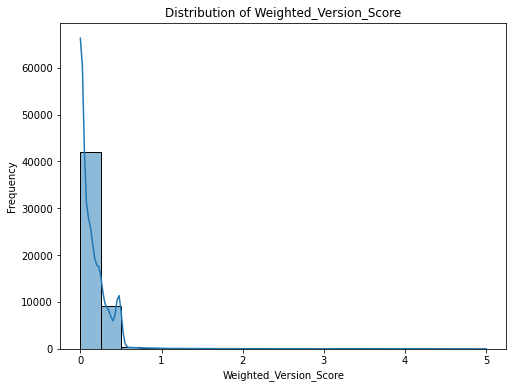

In [12]:
# Histogram of Current Version Score
plt.figure(figsize=(8, 6))
sns.histplot(app['Weighted_Version_Score'], bins=20, kde=True)
plt.xlabel('Weighted_Version_Score')
plt.ylabel('Frequency')
plt.title('Distribution of Weighted_Version_Score')
plt.show()

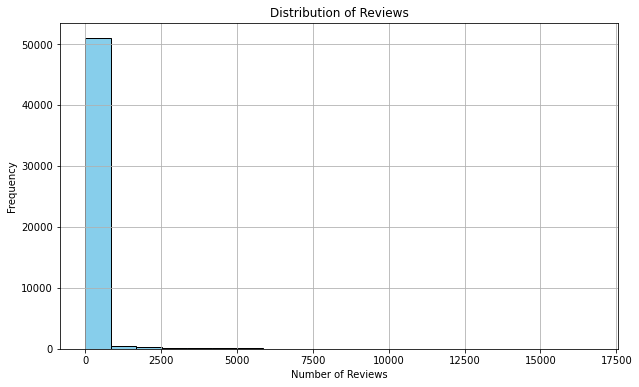

In [13]:
plt.figure(figsize=(10, 6))
plt.hist(app['Reviews'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency')
plt.title('Distribution of Reviews')
plt.grid(True)
plt.show()

The plots confirm with our analysis showing a strong right-skewed distribution as the Weighted_Version_Score strongly depending on the number of reviews that an app has.

#### 2. Price

#### (a). Distribution of Price

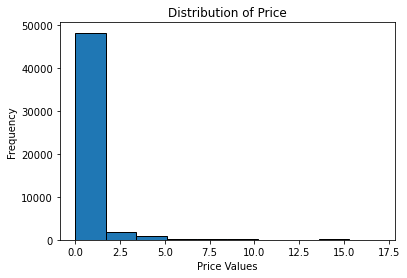

In [14]:
z_scores = standardize_column(app,'Price')
#Define a threshold for identifying outliers
threshold = 3 
data_without_outliers = app[z_scores <= threshold]

#Price distribution
plt.hist(data_without_outliers['Price'],bins=10, edgecolor='black')
plt.title('Distribution of Price')
plt.xlabel('Price Values')
plt.ylabel('Frequency')
plt.show()

As evident from the histogram, the majority of apps are priced below $2.5, with a significant number of them being offered for free. This trend indicates that free apps tend to be more appealing to users, leading to higher download rates.

#### (b). Distribution of Weighted Version Score and Price

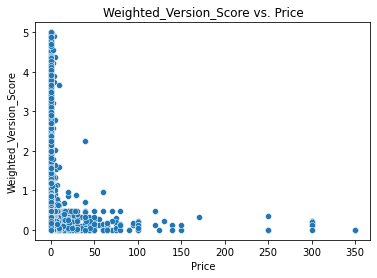

In [15]:
# Scatter plot: Current Version Score vs. Price
sns.scatterplot(x='Price', y='Weighted_Version_Score', data=app)
plt.xlabel('Price')
plt.ylabel('Weighted_Version_Score')
plt.title('Weighted_Version_Score vs. Price')
plt.show()

The examination of the plot graph depicting weighted version scores against app prices reveals a notable trend: cheaper apps tend to receive higher scores, likely due to their ability to attract a larger user base and garner more ratings. However, this broader user engagement also exposes them to a greater number of low scores, affecting their overall rating. Conversely, higher-priced apps exhibit lower scores, as users' elevated expectations when paying a premium can result in more critical reviews. In conclusion, app pricing significantly influences their weighted version scores, with cheaper apps benefiting from increased user participation but facing mixed reviews, while higher-priced apps may contend with greater scrutiny and lower ratings.

#### 3.  Update_Frequency

In [16]:
# Descriptive Statistics
app['Update_Frequency'].describe()

count    52184.000000
mean         1.954031
std          1.198018
min          1.000000
25%          1.054279
50%          1.495579
75%          2.368491
max          8.210462
Name: Update_Frequency, dtype: float64

**a). Update Frequency Distribution (Histogram):**

The histogram shows the distribution of `Update_Frequency` values in the dataset. It is a bar-like plot where each bar represents a range of `Update_Frequency` values, and the height of the bar indicates the frequency of apps falling within that range. The x-axis represents the range of update frequency (in days), and the y-axis represents the frequency (number of apps). This graph helps you understand the common update frequency patterns in the dataset.

**b). Update Frequency Box Plot:**

The box plot is used to visualize the distribution of `Update_Frequency` and identify potential outliers. It shows the median (the line inside the box), the interquartile range (the box), and any outliers (data points beyond the whiskers). The x-axis represents the `Update_Frequency` values in days. Outliers may appear as individual points beyond the whiskers, and they could indicate apps with unusually high or low update frequencies compared to the majority.

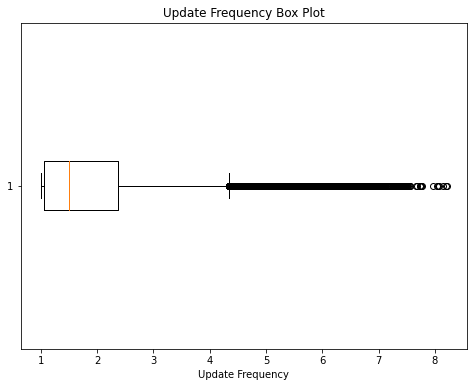

In [17]:
# Box Plot to visualize outliers
plt.figure(figsize=(8, 6))
plt.boxplot(app['Update_Frequency'], vert=False)
plt.xlabel('Update Frequency')
plt.title('Update Frequency Box Plot')
plt.show()

**c). Update Frequency vs. Weighted Version Score (Scatter Plot):**

This scatter plot shows the relationship between `Update_Frequency` and the target variable `Weighted_Version_Score`. Each point on the graph represents an app, where the x-coordinate is the `Update_Frequency` and the y-coordinate is the corresponding `Weighted_Version_Score`. The scatter plot helps you visualize any potential correlation or pattern between update frequency and the app's version score. A positive correlation might suggest that more frequent updates lead to higher version scores.

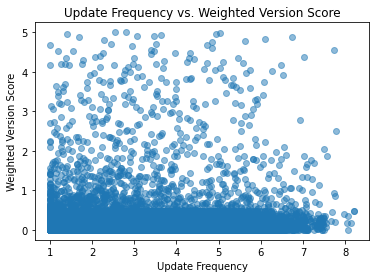

In [18]:
# Relationship with the Target Variable (Version Score)
plt.scatter(app['Update_Frequency'], app['Weighted_Version_Score'], alpha=0.5)
plt.xlabel('Update Frequency')
plt.ylabel('Weighted Version Score')
plt.title('Update Frequency vs. Weighted Version Score')
plt.show()

**d). Update Frequency by Primary Genre (Box Plot):**

If you have a categorical variable like `Primary_Genre`, this box plot shows the distribution of `Update_Frequency` across different genres. Each box represents the distribution of `Update_Frequency` for a specific genre. It allows you to compare the update frequencies of apps belonging to different genres. The x-axis represents the `Primary_Genre`, and the y-axis represents the `Update_Frequency values in days`.

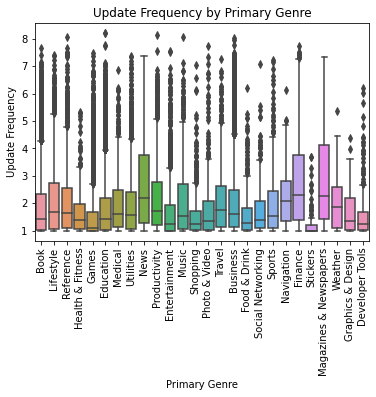

In [19]:
# Categorical Variables
sns.boxplot(x='Primary_Genre', y='Update_Frequency', data=app)
plt.xticks(rotation=90)
plt.xlabel('Primary Genre')
plt.ylabel('Update Frequency')
plt.title('Update Frequency by Primary Genre')
plt.show()

#### 4. Genre	

#### (a). Distrbution of Genre

In [20]:
app_count_per_genre = app['Primary_Genre'].value_counts()
app_count_per_genre

Business                  14810
Education                 13203
Book                       5904
Games                      4175
Finance                    2202
Entertainment              1841
Productivity               1502
Reference                  1472
Utilities                  1228
Lifestyle                  1191
Music                       712
Medical                     524
Travel                      508
Shopping                    496
Photo & Video               413
Social Networking           352
Food & Drink                334
News                        318
Developer Tools             299
Health & Fitness            242
Sports                      210
Navigation                   88
Stickers                     80
Graphics & Design            34
Magazines & Newspapers       24
Weather                      22
Name: Primary_Genre, dtype: int64

In [21]:
mean_score_per_genre = app.groupby('Primary_Genre')['Weighted_Version_Score'].mean()

# Create a new DataFrame with 'counts' and 'mean_score'
genre_summary_df = pd.DataFrame({
    'counts': app_count_per_genre,
    'mean_score': mean_score_per_genre
})

# Sort the DataFrame by 'counts' in descending order
genre_summary_df = genre_summary_df.sort_values(by='counts', ascending=False)
genre_summary_df


,counts,mean_score
Business,14810,0.129670
Education,13203,0.145306
Book,5904,0.164560
Games,4175,0.207675
Finance,2202,0.197861
Entertainment,1841,0.186789
Productivity,1502,0.176320
Reference,1472,0.172625
Utilities,1228,0.165683
Lifestyle,1191,0.123523


We created a new dataframe specifically for genre for better analysis. The two columns are counts (number of apps) and mean_score (average Weighted_Version_Score) of genres. 

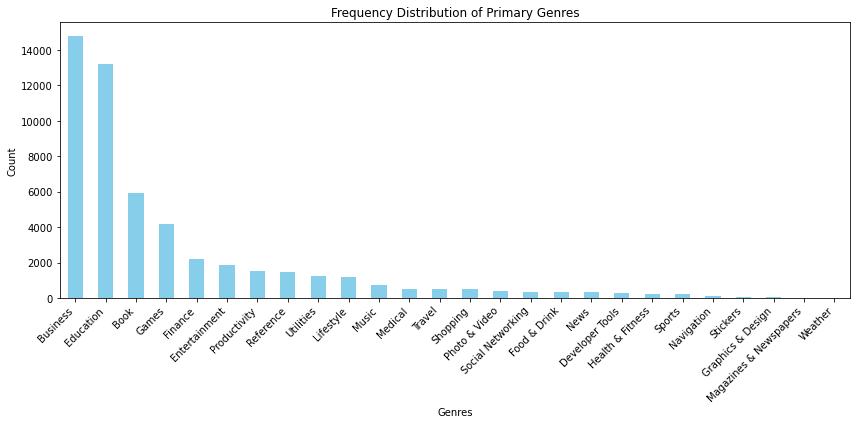

In [22]:
# Create a bar plot for counts
plt.figure(figsize=(12, 6))
genre_summary_df['counts'].plot(kind='bar', color='skyblue')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.title('Frequency Distribution of Primary Genres')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

As we can see, bussiness with the most counts does not have the highest mean_score. 

#### (b). Distribution of Weighted Version Score VS Genre

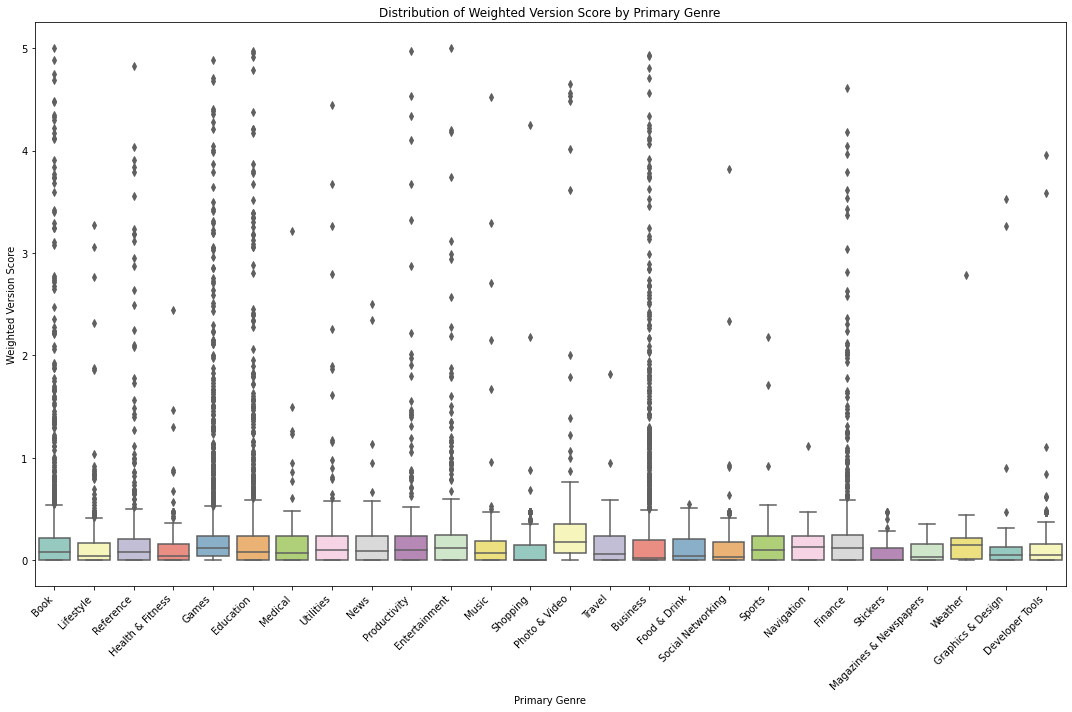

In [23]:
plt.figure(figsize=(15, 10))
sns.boxplot(x='Primary_Genre', y='Weighted_Version_Score', data=app, palette='Set3')
plt.xlabel('Primary Genre')
plt.ylabel('Weighted Version Score')
plt.title('Distribution of Weighted Version Score by Primary Genre')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Upon examining the distribution of all genres, we discovered a common pattern characterized by strong susceptibility to outliers.

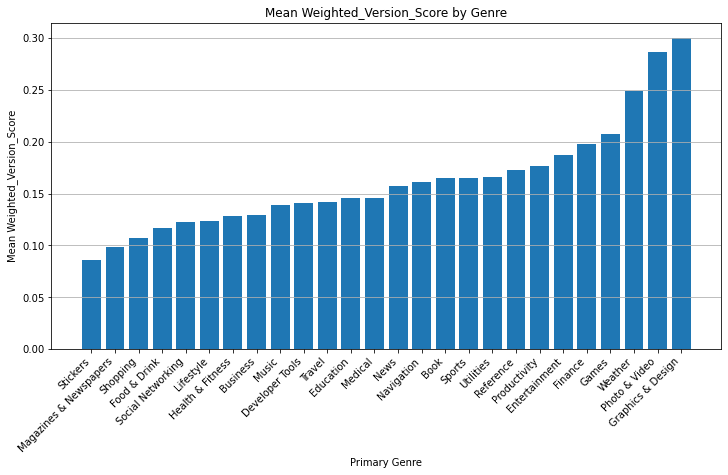

In [24]:
sorted_genre_summary_df = genre_summary_df.sort_values(by='mean_score', ascending=True)

# Bar plot
plt.figure(figsize=(12, 6))
plt.bar(sorted_genre_summary_df.index, sorted_genre_summary_df['mean_score'])
plt.xticks(rotation=90)
plt.xlabel('Primary Genre')
plt.ylabel('Mean Weighted_Version_Score')
plt.title('Mean Weighted_Version_Score by Genre')
plt.grid(axis='y')
plt.xticks(rotation=45, ha='right')
plt.show()

In [25]:
genre_summary_df.sort_values(by='mean_score', ascending=False)

,counts,mean_score
Graphics & Design,34,0.299679
Photo & Video,413,0.286260
Weather,22,0.248807
Games,4175,0.207675
Finance,2202,0.197861
Entertainment,1841,0.186789
Productivity,1502,0.176320
Reference,1472,0.172625
Utilities,1228,0.165683
Sports,210,0.165397


From the bar plot, apps that are in Graphics & Design genre tends to be the most popular ones as this genre has the highest mean_score. And this dataframe is sorted by the mean_score in decreasing order.